In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Find the eigenspace of Tbar (for different transformations)

In [4]:
# Type of input: image or sequence
inputType = "image"
# inputType = "sequence"

In [5]:
import numpy as np
import itertools
from functools import partial
from invariantSubspaces import G_permutation, G_rotation, G_color_permutation, G_verticalFlip, getInvariantSubspace, showSubspace


if inputType == "sequence":
    n = 5 # Sequence length
    Wshape = (n, 1)
    Wsize = np.prod(Wshape)
    groupNames = list(itertools.combinations(range(n), 2))
    groups = []
    for ij in groupNames:
        f = partial(G_permutation, pos=ij)
        f.__name__ = ij
        groups.append(f) 
    
else:
    inputChannels = 3
    kernelSize = (3, 3)
    Wshape = (3, *kernelSize)
    Wsize = np.prod(Wshape)
    groups = [G_rotation, G_color_permutation, G_verticalFlip]

listV = []
for g in groups:
    V, Vc, S = getInvariantSubspace(Wshape, g, method="onehot")
    listV.append(V)

[INFO]: Using 2 CPUs to get G_rotation
[INFO]: Using 2 CPUs to get G_color_permutation
[INFO]: Using 2 CPUs to get G_verticalFlip


Example basis for the invariant subspaces. For images, channels are stacked horizontally.
Invariant Subspace of G_rotation: 3 example basis


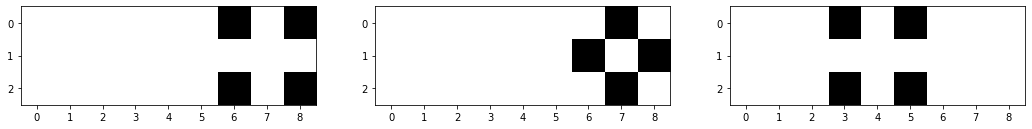

Invariant Subspace of G_color_permutation: 3 example basis


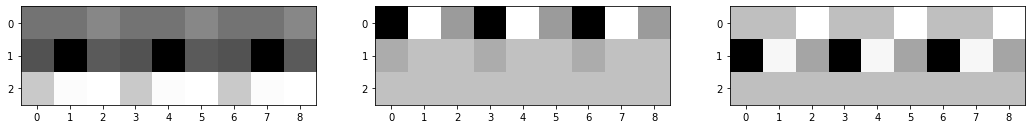

Invariant Subspace of G_verticalFlip: 3 example basis


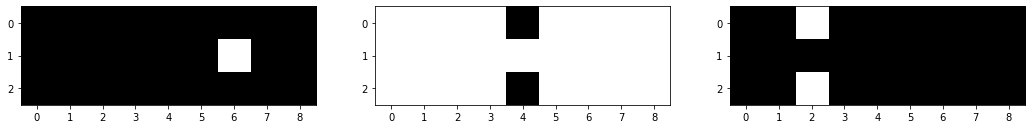

In [6]:
if inputType == "sequence":
    print(f"Example basis for the invariant subspaces.")
else:
    print(f"Example basis for the invariant subspaces. For images, channels are stacked horizontally.")
nBasisShow = 3
for g, V in zip(groups, listV):
    print(f"Invariant Subspace of {g.__name__}: {nBasisShow} example basis")
    showSubspace(V, Wshape, ndim=nBasisShow, channels=True)

### Theorem 3 : Find bases for entire $W$ space in partial order of decreasing invariance 

In [7]:
from invariantSubspaces import findAllSubspaces, indexPowerSetTranspositions
listT = groups
if inputType == 'sequence':
    # Use a more efficient of looping over the power set by 
    #    ignoring those subsets known to have no basis.
    powerSetMethod = indexPowerSetTranspositions
else:
    powerSetMethod = None
    
powerSet, powerSetConfigs = findAllSubspaces(listV=listV, listT=listT, powerSetMethod=powerSetMethod)

Finding subspace of  ['G_rotation', 'G_color_permutation', 'G_verticalFlip']
Finding subspace of  ['G_rotation', 'G_color_permutation']
Finding subspace of  ['G_rotation', 'G_verticalFlip']
Finding subspace of  ['G_color_permutation', 'G_verticalFlip']
Finding subspace of  ['G_rotation']
Finding subspace of  ['G_color_permutation']
Finding subspace of  ['G_verticalFlip']
Finding subspace of  []


Subspace of  ['G_rotation', 'G_color_permutation', 'G_verticalFlip']


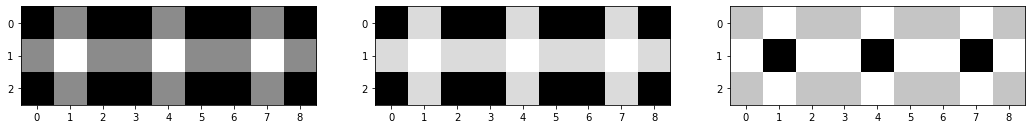

Subspace of  ['G_rotation', 'G_verticalFlip']


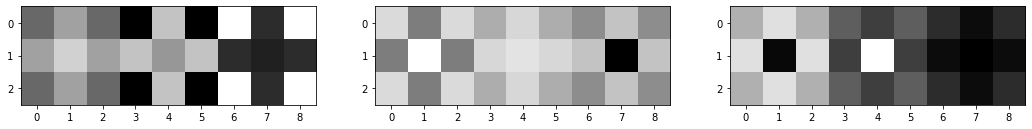

Subspace of  ['G_color_permutation', 'G_verticalFlip']


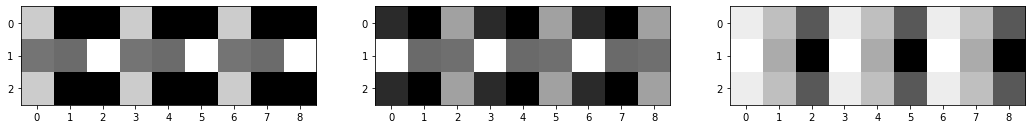

Subspace of  ['G_color_permutation']


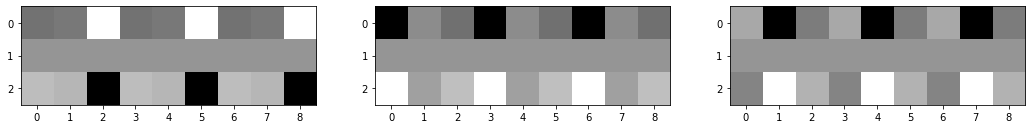

Subspace of  ['G_verticalFlip']


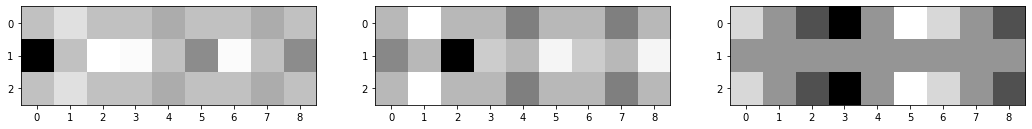

Subspace of  []


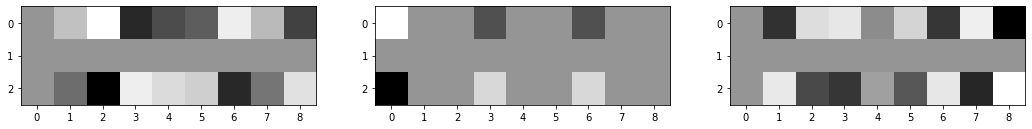

In [8]:
for subspace, config in zip(powerSet, powerSetConfigs):
    print("Subspace of ", [listT[i].__name__ for i in config])
    showSubspace(subspace, Wshape, 3, channels=True)